# Завдання на практичну роботу #4

## Частина перша - Бінарна класифікація (Binary Classification):

Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Бінарна класифікація: Де модель визначає, чи належить вхідний зразок одному з двох класів, наприклад, "позитивний" або "негативний", "хворий" або "здоровий".

### Підготовка даних

Імпорт бібліотек

In [116]:
# Імпорт необхідних бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


Завантаження даних з файлу

In [117]:
# Завантаження даних
data = pd.read_csv('classification_dataset.csv')

In [118]:
print(data.head())

   Feature1  Feature2  Target
0 -0.872929  0.013042       1
1  1.312935  2.770534       1
2  2.340428  2.420996       1
3  2.294548 -0.404380       1
4  0.944105  0.477241       1


Перевірка на пропущені значення


In [119]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

# Нема

Series([], dtype: int64)


In [120]:
data['Target'].value_counts()

Target
1    100
0    100
Name: count, dtype: int64

### Тренування, оцінка моделей

Вибір цільової змінної

In [121]:
# Вибір цільової змінної (відгуку) та предикторів
np.random.seed(42)

X = data.drop(['Target'], axis=1)
y = data['Target']

Підбір гіперпараметрів

In [122]:
# Визначення гіперпараметрів та їх значень
param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}
# Ініціалізація моделі та пошук оптимальних параметрів
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 7, 'n_estimators': 200}


Використовуючи Cross-Validation

In [123]:
clf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)   # n_estimators - к-сть дерев, max_depth - їх глибина
# Перехресна оцінка RandomForestClassifier
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')           # Accuracy
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')    # Precision
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')          # Recall
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')                  # F1
cv_r2 = cross_val_score(clf, X, y, cv=5, scoring='r2')                  # R2
cv_mae = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')   # mean absolute error
cv_mse = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')    # mean squared error
cv_roc_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')        # roc-auc
mean_accuracy = scores.mean()
std_accuracy = scores.std()

lr_model = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=200)
# Перехресна оцінка LogisticRegression
scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')           # Accuracy
cv_precision_lr = cross_val_score(lr_model, X, y, cv=5, scoring='precision')    # Precision
cv_recall_lr = cross_val_score(lr_model, X, y, cv=5, scoring='recall')          # Recall
cv_f1_lr = cross_val_score(lr_model, X, y, cv=5, scoring='f1')                  # F1
cv_r2_lr = cross_val_score(lr_model, X, y, cv=5, scoring='r2')                  # R2
cv_mae_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_absolute_error')   # mean absolute error
cv_mse_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')    # mean squared error
cv_roc_auc_lr = cross_val_score(lr_model, X, y, cv=5, scoring='roc_auc')        # roc-auc
mean_accuracy_lr = scores_lr.mean()
std_accuracy_lr = scores_lr.std()

dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
# Перехресна оцінка DecisionTreeClassifier
scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')           # Accuracy
cv_precision_dt = cross_val_score(dt_model, X, y, cv=5, scoring='precision')    # Precision
cv_recall_dt = cross_val_score(dt_model, X, y, cv=5, scoring='recall')          # Recall
cv_f1_dt = cross_val_score(dt_model, X, y, cv=5, scoring='f1')                  # F1
cv_r2_dt = cross_val_score(dt_model, X, y, cv=5, scoring='r2')                  # R2
cv_mae_dt = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_absolute_error')   # mean absolute error
cv_mse_dt = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')    # mean squared error
cv_roc_auc_dt = cross_val_score(dt_model, X, y, cv=5, scoring='roc_auc')        # roc-auc
mean_accuracy_dt = scores_dt.mean()
std_accuracy_dt = scores_dt.std()



Вивід точності моделей

In [124]:
print('\n---For Random Forest Classifier---')
print(f'Середня Точність: {mean_accuracy*100:.2f}%')
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy))
print(f'Precision: {np.mean(cv_precision):.2f}')
print(f'Recall: {np.mean(cv_recall):.2f}')
print(f'F-1: {np.mean(cv_f1):.2f}')
print(f'R-2: {np.mean(cv_r2):.2f}')
print(f'Mean Absolute Error (higher=better): {np.mean(cv_mae):.2f}')
print(f'Mean Squared Error (higher=better): {np.mean(cv_mse):.2f}')
print(f'Mean ROC-AUC: {np.mean(cv_roc_auc):.2f}')

print('\n---For Logistic Regression---')
print(f'Середня Точність: {mean_accuracy_lr*100:.2f}%')
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy_lr))
print(f'Precision: {np.mean(cv_precision_lr):.2f}')
print(f'Recall: {np.mean(cv_recall_lr):.2f}')
print(f'F-1: {np.mean(cv_f1_lr):.2f}')
print(f'R-2: {np.mean(cv_r2_lr):.2f}')
print(f'Mean Absolute Error (higher=better): {np.mean(cv_mae_lr):.2f}')
print(f'Mean Squared Error (higher=better): {np.mean(cv_mse_lr):.2f}')
print(f'Mean ROC-AUC: {np.mean(cv_roc_auc_lr):.2f}')

print('\n---Decision Tree Classifier---')
print(f'Середня Точність: {mean_accuracy_dt*100:.2f}%')
print("Стандартне відхилення точності: {:.2f}".format(std_accuracy_dt))
print(f'Precision: {np.mean(cv_precision_dt):.2f}')
print(f'Recall: {np.mean(cv_recall_dt):.2f}')
print(f'F-1: {np.mean(cv_f1_dt):.2f}')
print(f'R-2: {np.mean(cv_r2_dt):.2f}')
print(f'Mean Absolute Error (higher=better): {np.mean(cv_mae_dt):.2f}')
print(f'Mean Squared Error (higher=better): {np.mean(cv_mse_dt):.2f}')
print(f'Mean ROC-AUC: {np.mean(cv_roc_auc_dt):.2f}')


---For Random Forest Classifier---
Середня Точність: 85.00%
Стандартне відхилення точності: 0.06
Precision: 0.85
Recall: 0.86
F-1: 0.84
R-2: 0.40
Mean Absolute Error (higher=better): -0.15
Mean Squared Error (higher=better): -0.15
Mean ROC-AUC: 0.91

---For Logistic Regression---
Середня Точність: 83.50%
Стандартне відхилення точності: 0.06
Precision: 0.84
Recall: 0.84
F-1: 0.83
R-2: 0.34
Mean Absolute Error (higher=better): -0.16
Mean Squared Error (higher=better): -0.16
Mean ROC-AUC: 0.92

---Decision Tree Classifier---
Середня Точність: 82.00%
Стандартне відхилення точності: 0.05
Precision: 0.84
Recall: 0.81
F-1: 0.82
R-2: 0.28
Mean Absolute Error (higher=better): -0.18
Mean Squared Error (higher=better): -0.18
Mean ROC-AUC: 0.83


Передбачення моделей

In [125]:
y_pred_cv = cross_val_predict(clf, X, y, cv=5) 
conf_matrix = confusion_matrix(y, y_pred_cv)
print("Матриця плутанини Random Forest Classifier:")
print(conf_matrix)

y_pred_cv_lr = cross_val_predict(lr_model, X, y, cv=5) 
conf_matrix_lr = confusion_matrix(y, y_pred_cv_lr)
print("\nМатриця плутанини Logistic Regression:")
print(conf_matrix_lr)

y_pred_cv_dt = cross_val_predict(dt_model, X, y, cv=5) 
conf_matrix_dt = confusion_matrix(y, y_pred_cv_dt)
print("\nМатриця плутанини Decision Tree Classifier:")
print(conf_matrix_dt)


Матриця плутанини Random Forest Classifier:
[[84 16]
 [14 86]]

Матриця плутанини Logistic Regression:
[[83 17]
 [16 84]]

Матриця плутанини Decision Tree Classifier:
[[83 17]
 [19 81]]


### Візуалізація (Random Forest Classifier)

Гістограма

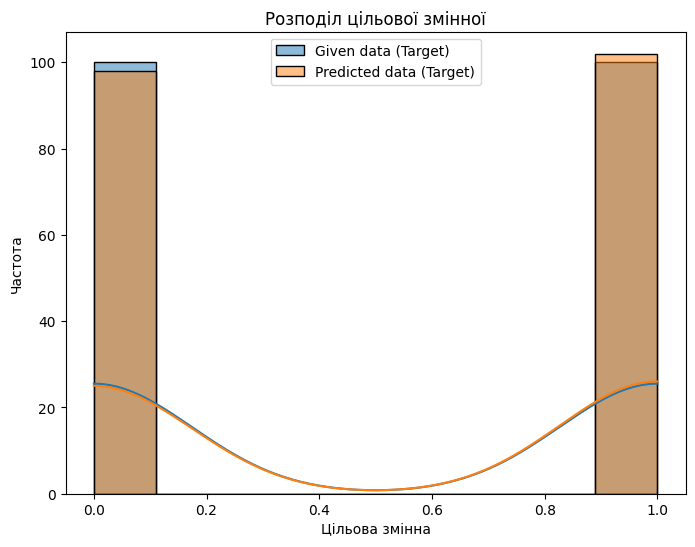

In [126]:
# Візуалізація розподілу цільової змінної (target)
plt.figure(figsize=(8, 6))
sns.histplot(data['Target'] , kde=True, label='Given data (Target)')
sns.histplot(y_pred_cv , kde=True, label='Predicted data (Target)')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.title('Розподіл цільової змінної')
plt.legend()
plt.show()

Матриця кореляції

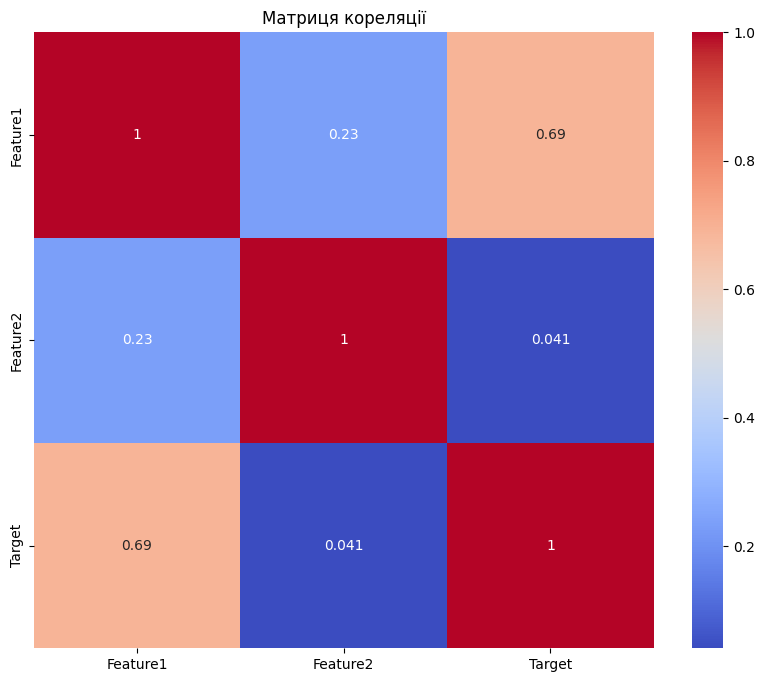

In [127]:
# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Діаграма розсіювання

Text(0.5, 1.0, 'Графік логістичної регресії')

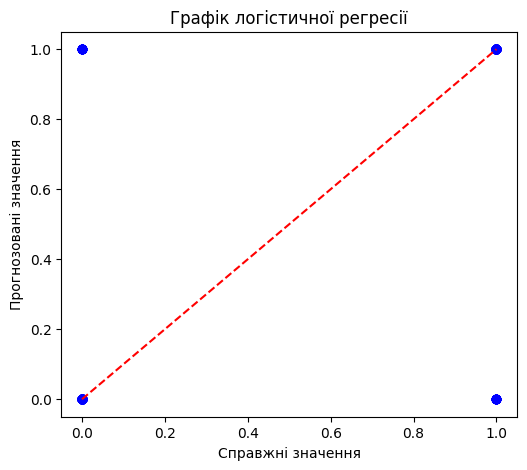

In [128]:
# Побудуємо діаграму розсіювання
# Візуалізація результатів
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(y, y_pred_cv, color='blue')
plt.plot([min(y), max(y)], [min(y_pred_cv), max(y_pred_cv)], linestyle='--', color='red')
plt.xlabel("Справжні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Графік логістичної регресії")

### Висновок

У ході виконання бінарної класифікації - були використані різні моделі, підібрані гіперпараметри до них. Також, була використана перехресна валідація для досягнення кращих результатів.

Точність та інші показники були оцінені для кожної моделі. І модель Random Forest Classifier була візуалізована за допомогою: гістограми, матриці кореляції та графіку

## Частина друга - Мультикласова класифікація (Multiclass Classification):

Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
Розділіть дані на навчальний та тестовий набори.
Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
Порівняйте результати різних класифікаторів.

Мультикласова класифікація - це задача, в якій модель вивчає прогнозувати класи для більш ніж двох можливих значень цільової змінної.

### Підготовка даних